In [1]:
#

from PIL import Image
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
from google.colab import drive

In [2]:
# import the dataset's zip file and extract it into the runtime

import zipfile
path = '/content/drive/MyDrive/DataScience/Train.zip'
zipObject = zipfile.ZipFile(file = path , mode = 'r')
zipObject.extractall('./')
zipObject.close()

In [3]:
# get the list of all the files in the folder extracted

import os
print(os.listdir('Train'))

['subject08.sad.gif', 'subject14.centerlight.gif', 'subject02.wink.gif', 'subject14.normal.gif', 'subject09.noglasses.gif', 'subject02.centerlight.gif', 'subject03.centerlight.gif', 'subject12.surprised.gif', 'subject03.sleepy.gif', 'subject06.wink.gif', 'subject09.sleepy.gif', 'subject05.glasses.gif', 'subject13.sleepy.gif', 'subject09.happy.gif', 'subject05.sleepy.gif', 'subject12.sleepy.gif', 'subject05.centerlight.gif', 'subject02.normal.gif', 'subject09.wink.gif', 'subject09.glasses.gif', 'subject05.leftlight.gif', 'subject13.noglasses.gif', 'subject01.happy.gif', 'subject06.centerlight.gif', 'subject03.glasses.gif', 'subject12.happy.gif', 'subject15.normal.gif', 'subject10.rightlight.gif', 'subject08.surprised.gif', 'subject07.surprised.gif', 'subject13.happy.gif', 'subject11.glasses.gif', 'subject07.happy.gif', 'subject06.glasses.gif', 'subject01.gif.gif', 'subject02.noglasses.gif', 'subject11.sad.gif', 'subject10.leftlight.gif', 'subject13.leftlight.gif', 'subject15.noglasses.g

In [4]:
# Function gets the data describing the data the images

def getImageData():
  # path of individual image
  paths = [os.path.join('Train' , f) for f in os.listdir('Train')]
  # print(paths)
  faces = []
  ids = []

  # for each path in the all the paths

  for path in paths:
   # print(path)
   
    # if it is .gif file
    if(path[-4:] == '.gif'):
      # convert it to grayscale image
      image = Image.open(path).convert('L')
      #print(image)
      # convert to numpy array to send to opencv where each pixel becomes into a integer value
      imageNp = np.array(image , 'uint8')
      #print(imageNp)
      id = int(os.path.split(path)[1].split('.')[0].replace('subject' , ''))
      #print(id)
      ids.append(id)
      faces.append(imageNp)
  return faces , np.array(ids)

In [5]:
faces , ids = getImageData()

In [6]:
faces , len(faces)

([array([[130, 130, 130, ..., 255, 255, 255],
         [255, 255, 255, ..., 255, 255, 255],
         [255, 255, 255, ..., 255, 255, 255],
         ...,
         [255, 255, 255, ..., 249, 224, 217],
         [255, 255, 255, ..., 253, 221, 206],
         [ 68,  68,  68, ...,  68,  68,  68]], dtype=uint8),
  array([[130, 130, 130, ..., 255, 255, 255],
         [255, 255, 255, ..., 255, 255, 255],
         [255, 255, 255, ..., 255, 255, 255],
         ...,
         [255, 255, 255, ..., 255, 255, 255],
         [255, 255, 255, ..., 255, 255, 255],
         [ 68,  68,  68, ...,  68,  68,  68]], dtype=uint8),
  array([[110, 114, 125, ..., 255, 255, 242],
         [238, 241, 255, ..., 255, 255, 249],
         [253, 255, 255, ..., 255, 252, 244],
         ...,
         [255, 255, 255, ..., 186, 182, 182],
         [255, 255, 255, ..., 182, 178, 175],
         [ 68,  68,  68, ...,  68,  68,  68]], dtype=uint8),
  array([[130, 130, 130, ..., 255, 255, 255],
         [255, 255, 255, ..., 255, 255,

In [7]:
ids , len(ids)

(array([ 8, 14,  2, 14,  9,  2,  3, 12,  3,  6,  9,  5, 13,  9,  5, 12,  5,
         2,  9,  9,  5, 13,  1,  6,  3, 12, 15, 10,  8,  7, 13, 11,  7,  6,
         1,  2, 11, 10, 13, 15, 14, 15,  2,  6,  7,  7,  8, 10,  1, 11,  8,
        11,  8, 14,  1,  3, 11,  6, 12,  9, 14,  7,  1,  1,  2,  8,  8, 14,
         5,  3, 12, 14,  4,  3, 15,  9,  3, 13,  5, 15,  4,  1, 13,  6,  1,
         1,  4,  2,  5,  6, 10,  9,  3,  8,  9, 13,  4,  4, 12, 10,  4,  7,
        11,  5, 15, 14, 11,  4,  7,  7, 12,  2, 10,  6,  6,  4, 10, 13,  8,
         6, 15, 11, 13, 10, 12,  7, 10,  2]), 128)

In [8]:
faces[0] , faces[0].shape

(array([[130, 130, 130, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        ...,
        [255, 255, 255, ..., 249, 224, 217],
        [255, 255, 255, ..., 253, 221, 206],
        [ 68,  68,  68, ...,  68,  68,  68]], dtype=uint8), (243, 320))

In [9]:
# Number of pixels in the entire face image

243 * 320

77760

In [10]:
# Instantiate the LBPH Classifier class which is going to create matrices of 8 * 8 and create histogram off of it

lbphClassifier = cv2.face.LBPHFaceRecognizer_create()
lbphClassifier.train(faces , ids)
lbphClassifier.write('lbphClassifier.yml')

In [11]:
# Load the model previously created from the training images

lbphFaceClassifier = cv2.face.LBPHFaceRecognizer_create()
lbphFaceClassifier.read('/content/lbphClassifier.yml')

In [12]:
import zipfile
path = '/content/drive/MyDrive/DataScience/Test.zip'
zipObject = zipfile.ZipFile(file = path , mode = 'r')
zipObject.extractall('./')
zipObject.close()

In [13]:
# Using a test image and converting it to grayscale and into into a np array

testImage = '/content/drive/MyDrive/DataScience/subject10.happy.gif'

image = Image.open(testImage).convert('L')
imageNp = np.array(image , 'uint8')
imageNp

array([[130, 130, 130, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 243, 255, 255],
       [255, 255, 255, ..., 238, 241, 255],
       [ 68,  68,  68, ...,  68,  68,  68]], dtype=uint8)

In [14]:
prediction = lbphFaceClassifier.predict(imageNp)
prediction

(10, 8.342018483570127)

In [15]:
expectedOutput = int(os.path.split(testImage)[1].split('.')[0].replace('subject' , ''))
expectedOutput

10

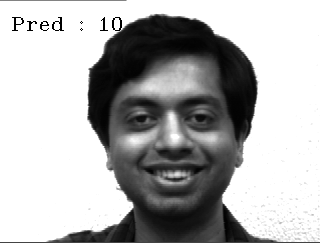

In [16]:
cv2.putText(imageNp , "Pred : " + str(prediction[0]) , (10,30) , cv2.FONT_HERSHEY_COMPLEX_SMALL , 1 , (0,255,0))
cv2_imshow(imageNp)

In [17]:
paths = [os.path.join('Test' , f) for f in os.listdir('Test')]

predictions = []
expectedOutputs = []


for path in paths:
  if(path[-4:] == '.gif'):
    image = Image.open(path).convert('L')
    imageNp = np.array(image , 'uint8')
    expectedOutput = int(os.path.split(path)[1].split('.')[0].replace('subject' , ''))
    prediction = lbphClassifier.predict(imageNp)
    predictions.append(prediction[0])
    expectedOutputs.append(expectedOutput)

In [18]:
from sklearn.metrics import accuracy_score

accuracy_score(expectedOutputs , predictions)

0.8157894736842105

In [19]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(expectedOutputs , predictions)
cm

array([[3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
       [0, 0, 2, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 2, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3]])

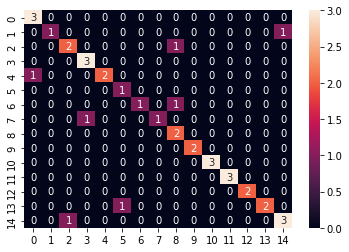

In [20]:
import seaborn as sns

sns.heatmap(cm , annot = True)

In [21]:
import dlib
import cv2
from google.colab.patches import cv2_imshow

In [28]:
faceDetector  = dlib.get_frontal_face_detector()
pointsDetector = dlib.shape_predictor('/content/drive/MyDrive/DataScience/shape_predictor_68_face_landmarks.dat')
faceDescriptorExtractor = dlib.face_recognition_model_v1('/content/drive/MyDrive/DataScience/dlib_face_recognition_resnet_model_v1.dat')

RuntimeError: ignored

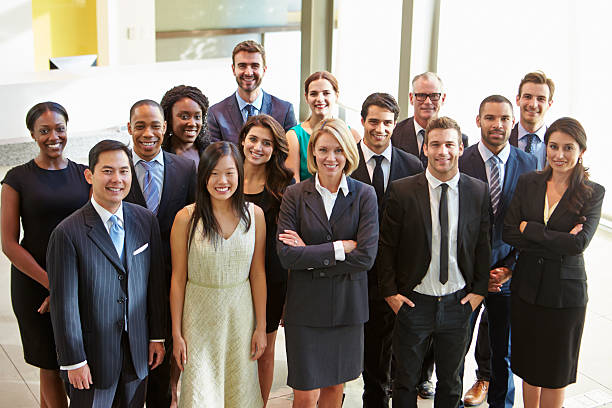

In [26]:
image = cv2.imread('photo.jpg')
cv2_imshow(image)

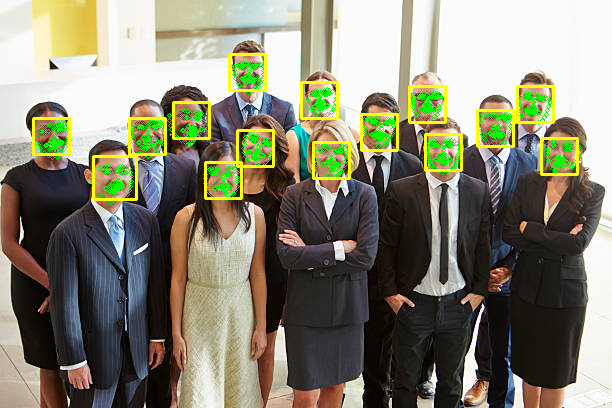

In [27]:
faceDetection = faceDetector(image , 1)  

for face in faceDetection:
  points = pointsDetector(image , face)
  for point in points.parts():
    cv2.circle(image ,  (point.x , point.y) , 2 , (0,255,0) , 1)
  l , t , r , b = face.left() , face.top() , face.right() , face.bottom()
  cv2.rectangle(image , (l,t) , (r,b) , (0,255,255) , 2)
cv2_imshow(image)

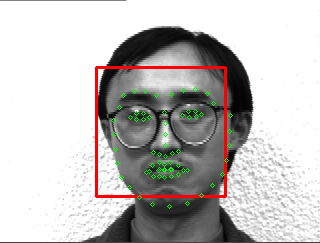

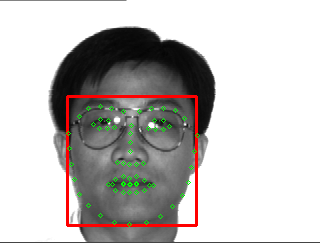

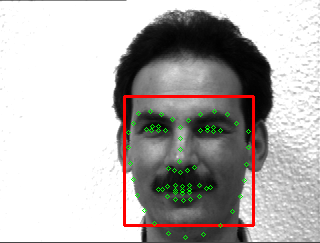

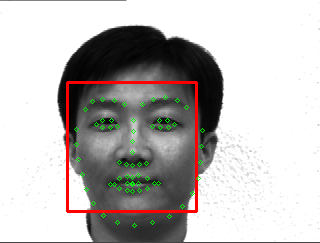

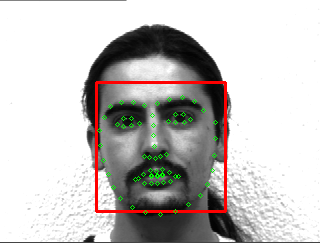

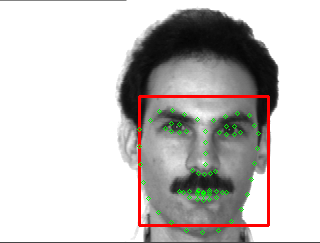

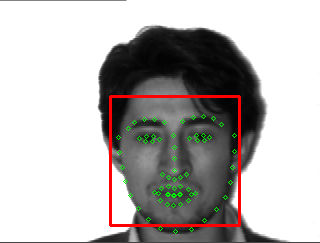

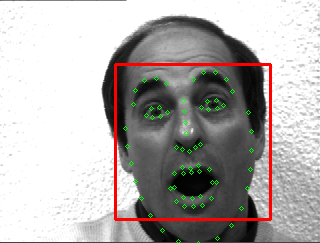

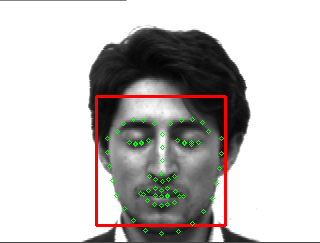

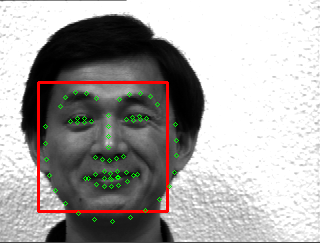

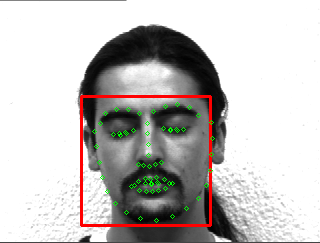

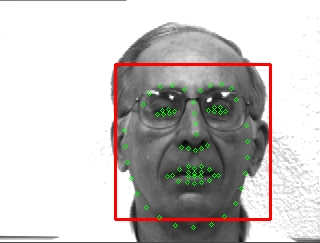

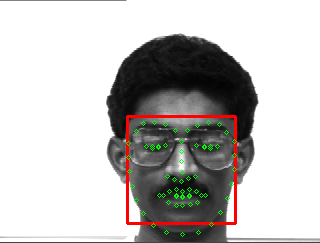

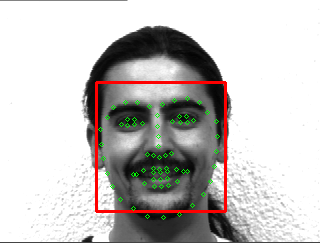

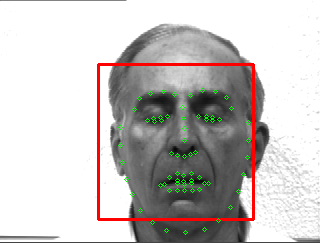

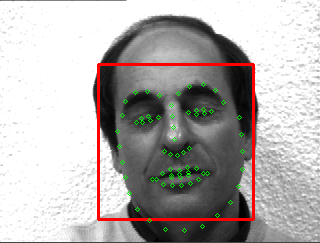

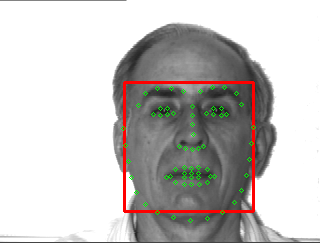

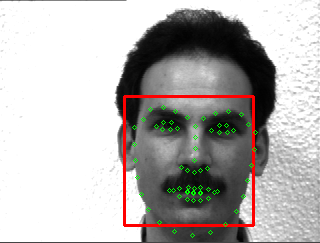

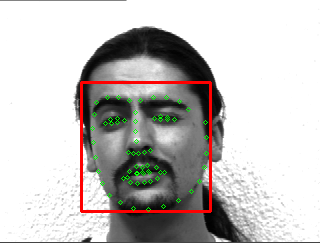

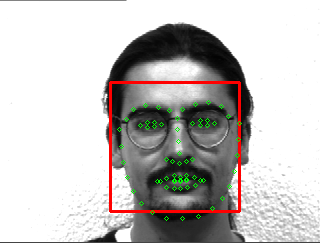

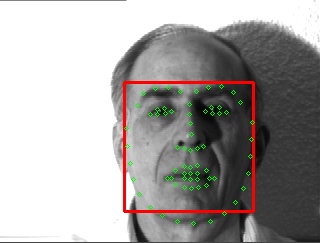

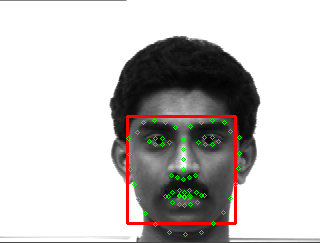

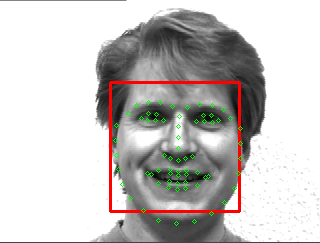

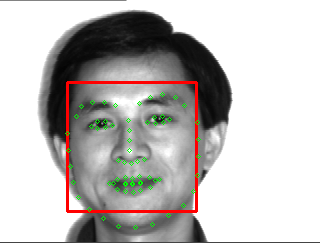

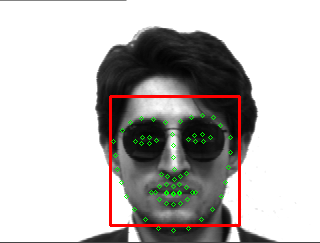

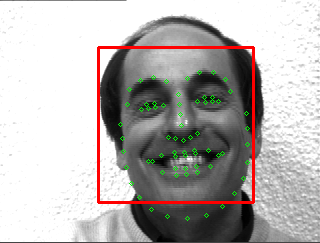

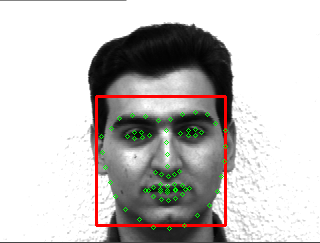

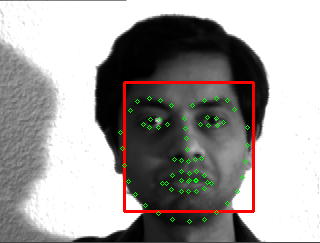

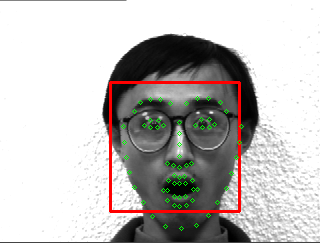

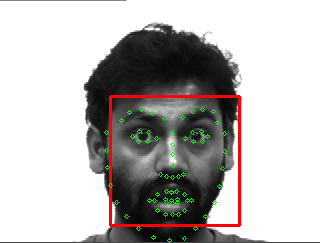

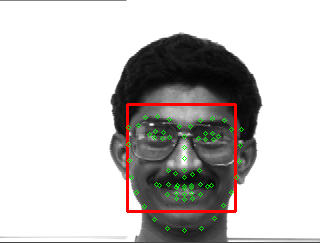

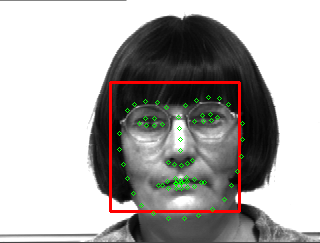

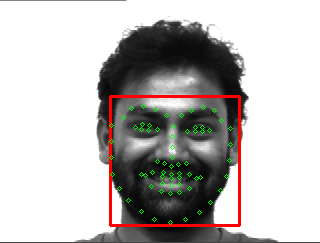

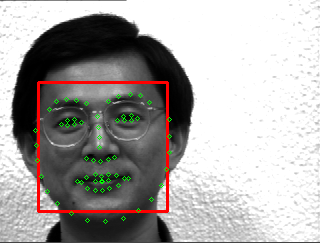

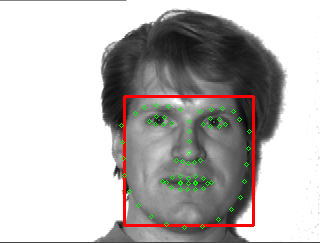

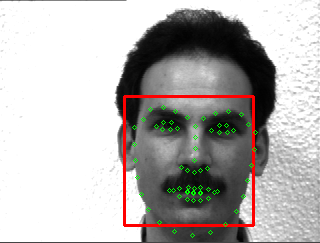

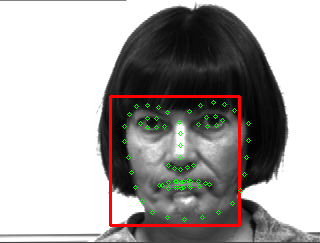

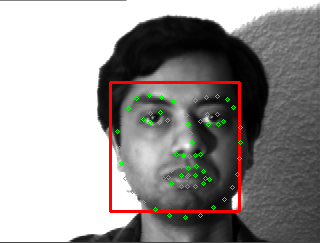

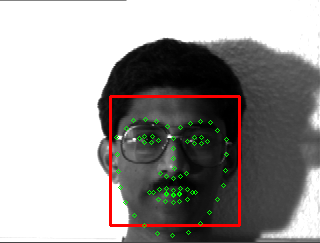

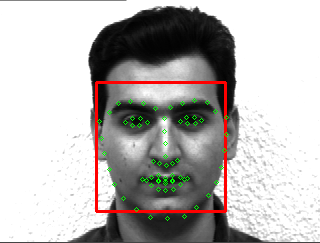

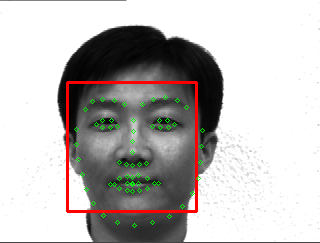

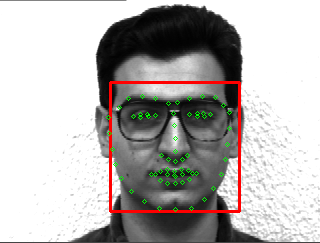

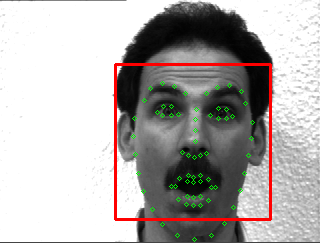

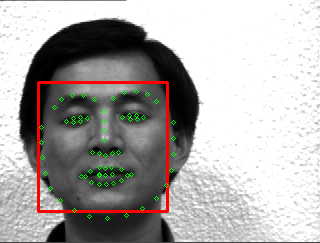

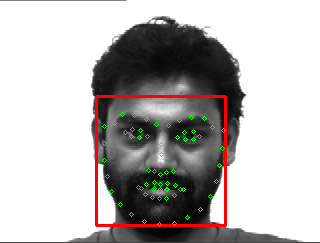

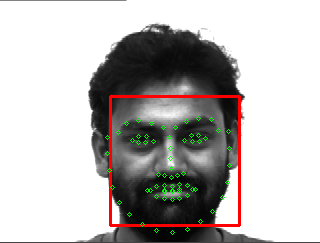

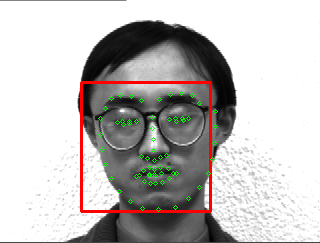

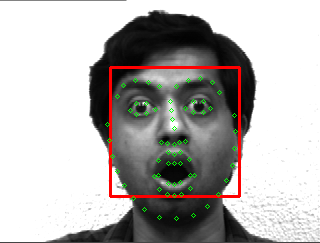

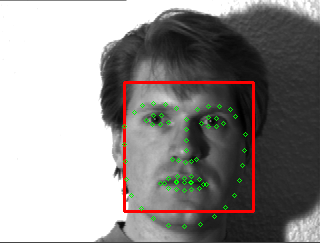

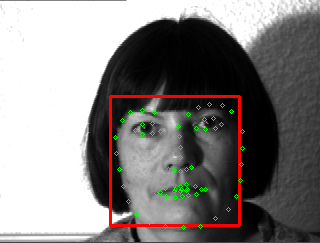

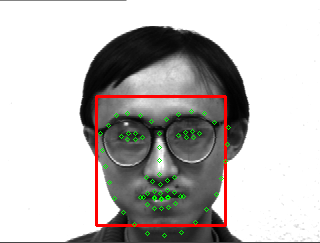

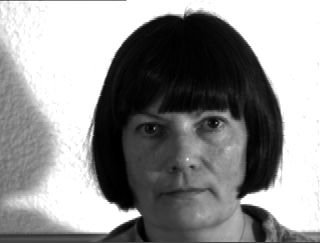

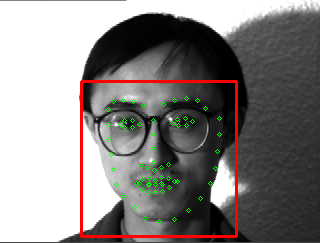

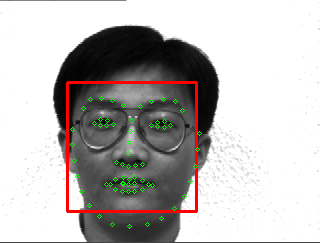

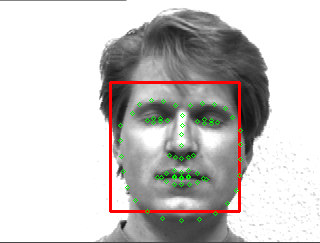

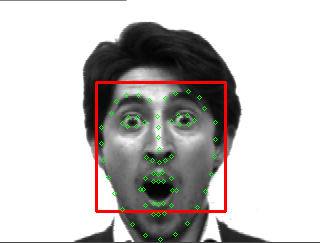

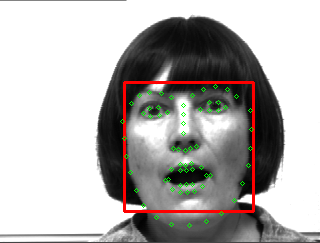

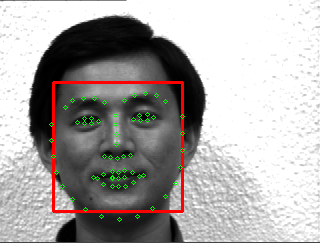

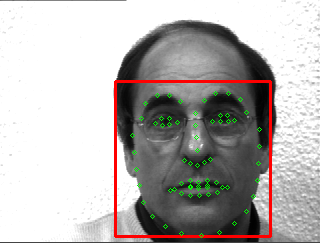

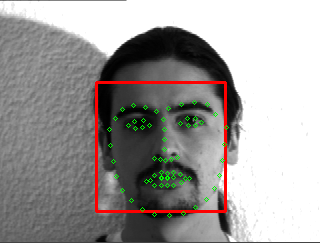

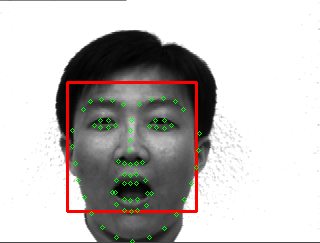

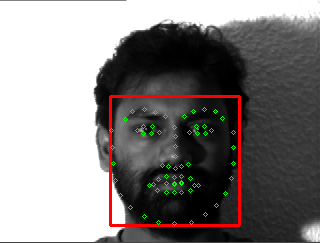

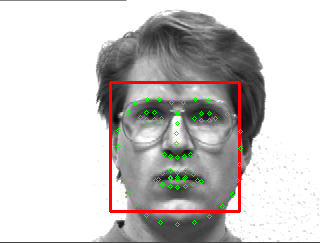

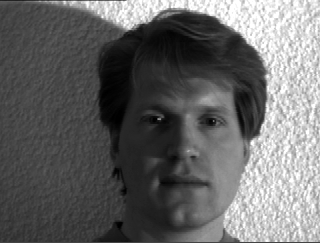

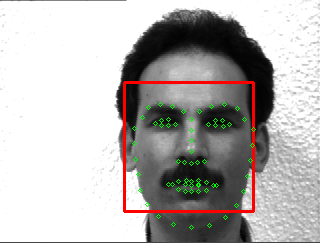

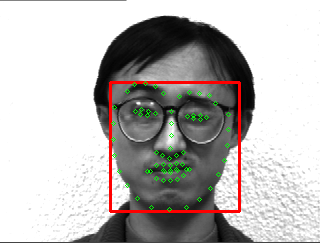

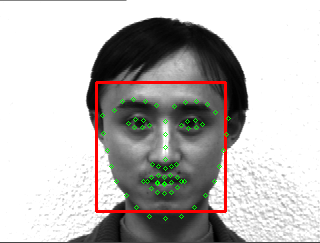

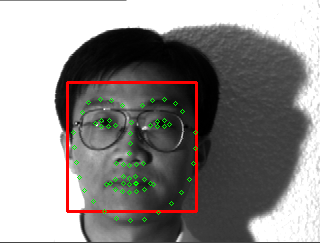

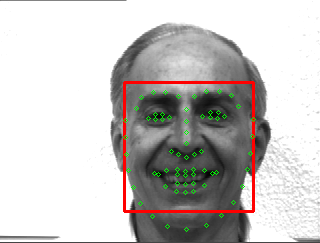

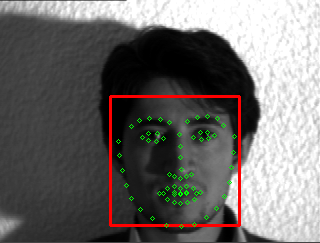

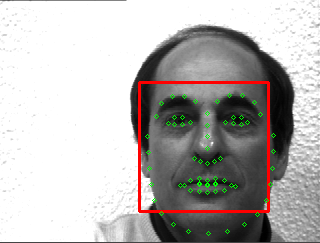

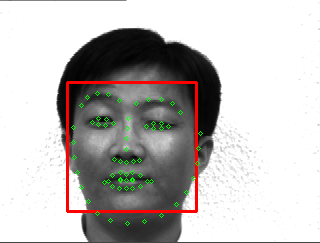

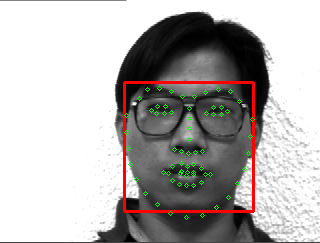

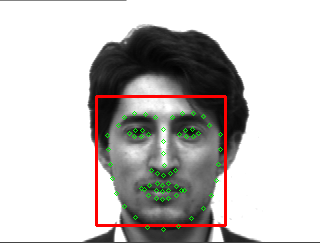

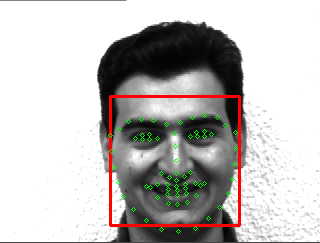

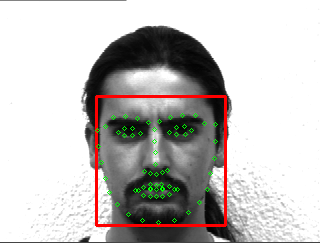

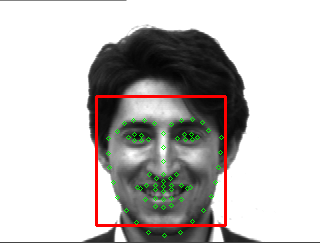

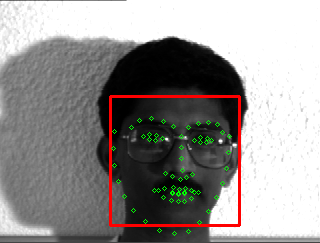

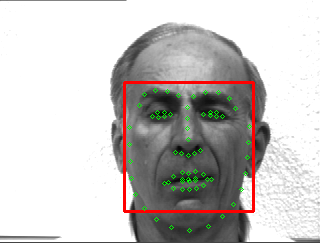

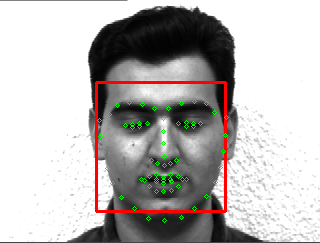

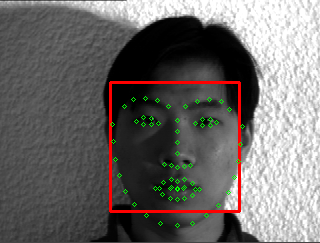

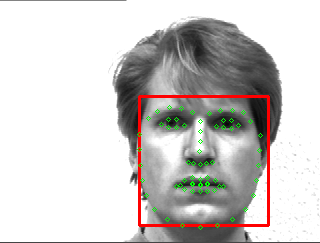

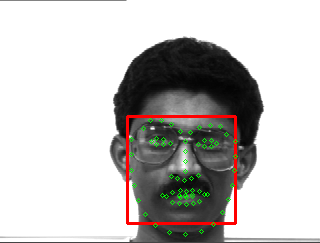

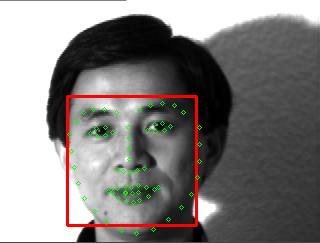

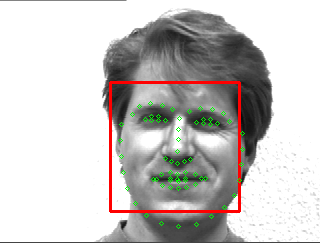

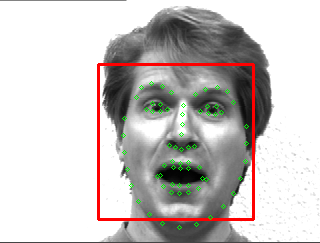

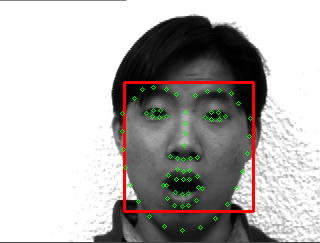

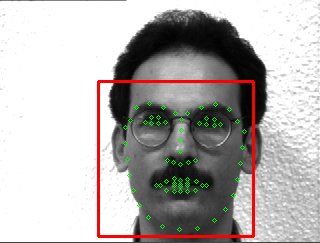

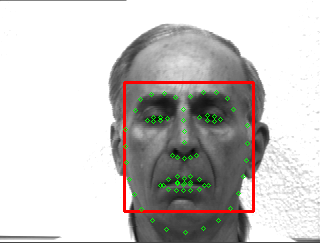

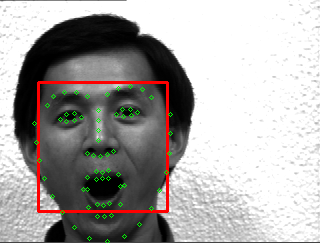

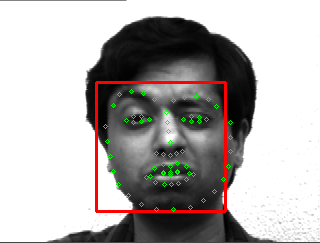

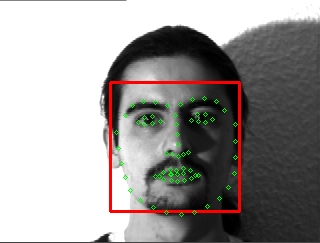

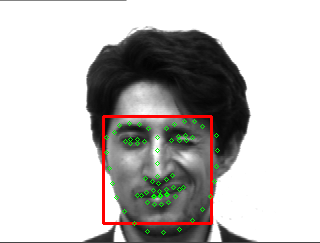

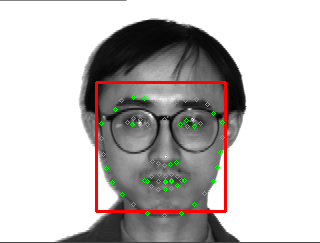

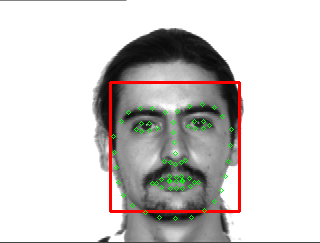

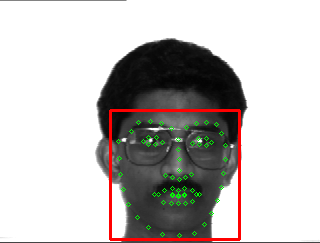

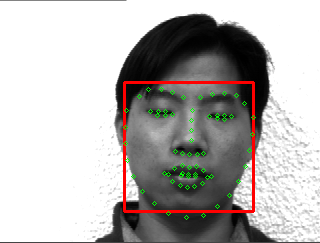

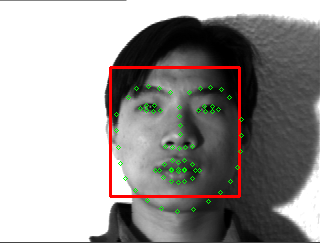

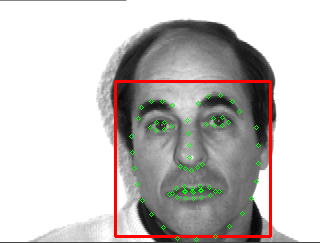

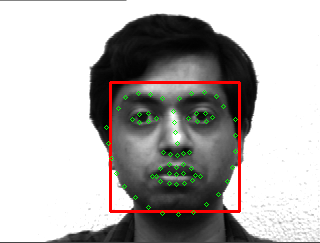

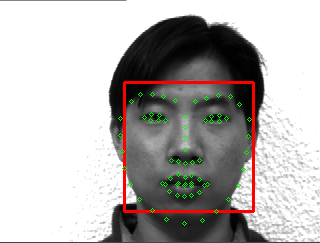

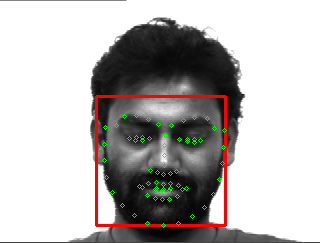

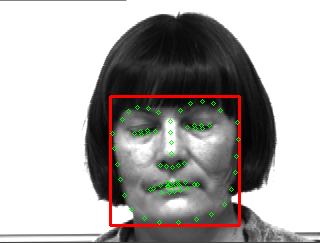

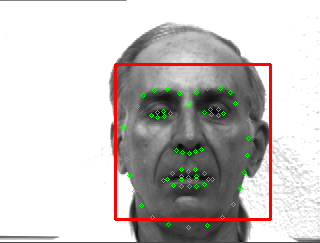

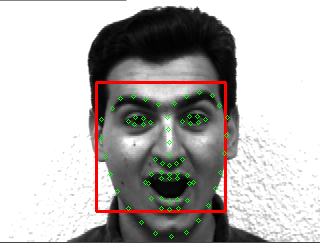

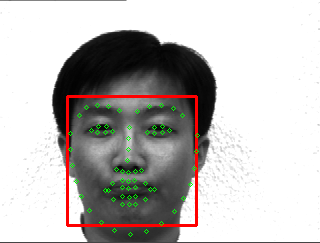

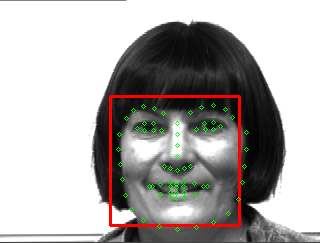

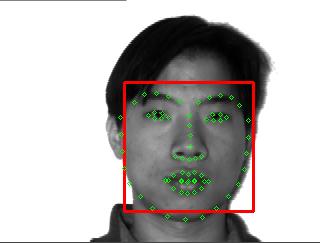

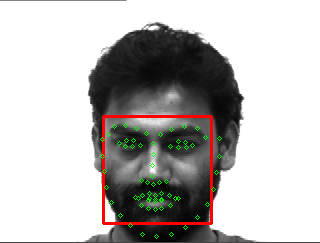

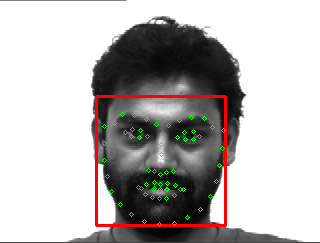

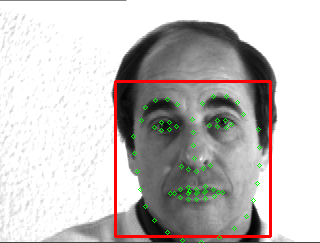

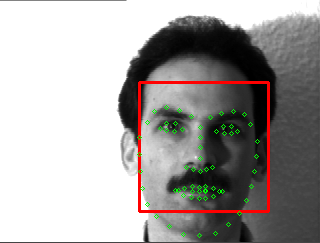

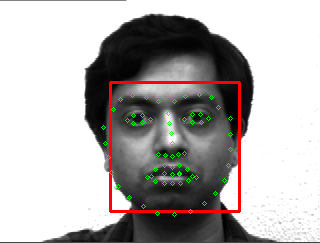

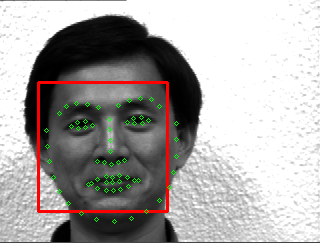

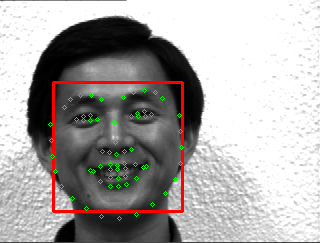

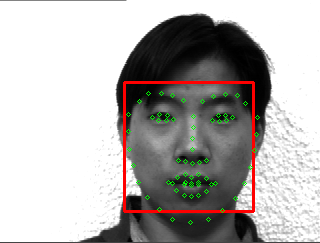

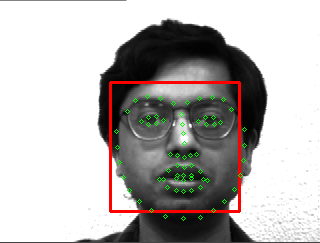

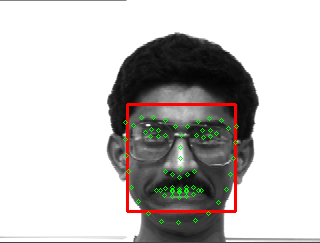

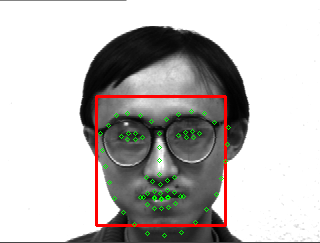

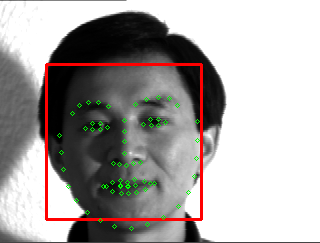

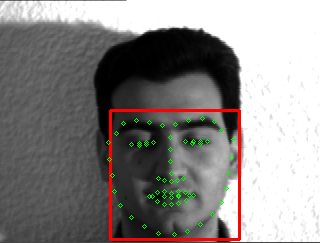

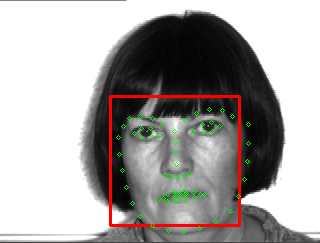

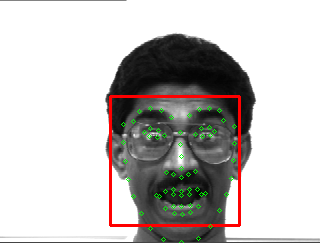

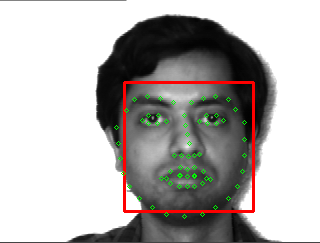

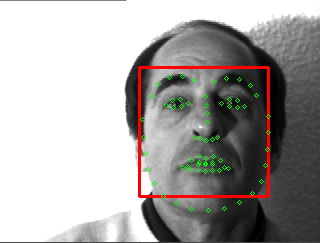

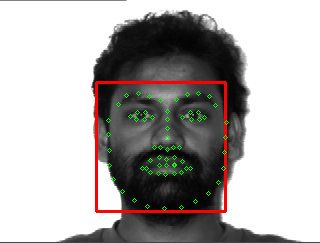

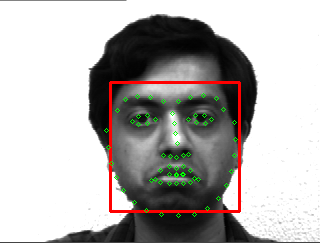

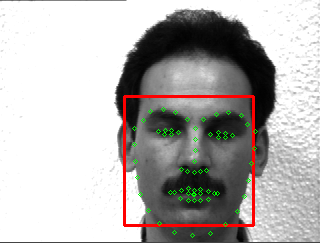

In [35]:
index = {}
idx = 0
faceDescriptors = None

paths = [os.path.join('/content/Train' , f) for f in os.listdir('/content/Train')]
for path in paths:
  image = Image.open(path).convert('RGB')
  imageNp = np.array(image , 'uint8')
  faceDetection = faceDetector(imageNp , 1)
  for face in faceDetection:
    l , t , r , b = face.left() , face.top() , face.right() , face.bottom()
    cv2.rectangle(imageNp , (l,t) , (r,b) , (0,0,255) , 2)

    points = pointsDetector(imageNp , face)
    for point in points.parts():
      cv2.circle(imageNp ,  (point.x , point.y) , 2 , (0,255,0) , 1)
  cv2_imshow(imageNp)